In [54]:
import pandas as pd
import numpy as numpy
import json 
import os 
import pylab as pl
import urllib
import requests
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import os
import pandas as pd
import urllib
import requests
import json
import sys
import io
import shapely
import base64
import urllib.request
import functools
import geopandas as gp
import fiona
import numpy as np
import matplotlib.pylab as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline


In [55]:
url = 'https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD'
arrests = pd.read_csv(url)
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [56]:
arrests['year'] = arrests['ARREST_DATE'].str[-2:]
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,17
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,17
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,17
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074,17
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811,17


In [57]:
violent = [139,140,153,155,157,164,166,168,175,176
          ,177,178,179,180,183,185,187,261,263,379
           ,380,397,586,639,640,665,104,105,106,
          107,109,112,122,123,124,125,129]

In [58]:
violent_arrests = arrests[arrests['PD_CD'].isin(violent)]
violent_arrests.shape

(407661, 19)

In [59]:
violent_arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085,17
12,173126364,12/31/2017,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,60,0.0,<18,F,BLACK,986771.0,148698.0,40.574825,-73.990927,17
17,173117305,12/31/2017,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2402500,M,Q,104,0.0,18-24,M,BLACK,1013787.0,195967.0,40.704520,-73.893470,17
24,173128431,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1600500,F,M,34,0.0,25-44,M,WHITE HISPANIC,1006797.0,253850.0,40.863414,-73.918487,17
25,173127729,12/31/2017,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,Q,106,0.0,25-44,F,WHITE HISPANIC,1038101.0,181874.0,40.665723,-73.805890,17


In [60]:
violent_2009 = violent_arrests[violent_arrests['year'] =='09']
violent_2014 = violent_arrests[violent_arrests['year'] =='14']

In [61]:
grouped09 = violent_2009.groupby('ARREST_PRECINCT').count().reset_index()
grouped14 = violent_2014.groupby('ARREST_PRECINCT').count().reset_index()

grouped09 = grouped09[['ARREST_PRECINCT','ARREST_KEY']]
grouped14 = grouped14[['ARREST_PRECINCT','ARREST_KEY']]

grouped09.rename(columns={'ARREST_KEY':'violent_arrests_09'}, inplace=True)
grouped14.rename(columns={'ARREST_KEY':'violent_arrests_14'}, inplace=True)

In [62]:
violent_arrests_09_14 = grouped09.merge(grouped14, on='ARREST_PRECINCT')

In [63]:
violent_arrests_09_14.head()

,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14
0,1,173,130
1,5,523,399
2,6,338,274
3,7,241,254
4,9,304,222


In [64]:
violent_arrests_09_14['%change'] = (violent_arrests_09_14['violent_arrests_14'] - violent_arrests_09_14['violent_arrests_09'])/violent_arrests_09_14['violent_arrests_09']

In [65]:
violent_arrests_09_14.head()

,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14,%change
0,1,173,130,-0.248555
1,5,523,399,-0.237094
2,6,338,274,-0.189349
3,7,241,254,0.053942
4,9,304,222,-0.269737


In [66]:
violent_arrests_09_14.describe()

,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14,%change
count,76.000000,76.000000,76.000000,76.000000
mean,62.565789,444.368421,423.986842,-0.069941
std,35.735075,238.520263,270.082678,0.202898
min,1.000000,39.000000,23.000000,-0.410256
25%,31.500000,249.750000,241.750000,-0.237906
50%,64.500000,415.000000,335.500000,-0.080823
75%,95.500000,571.500000,531.500000,0.042494
max,123.000000,1235.000000,1426.000000,0.496454


In [67]:
violent_arrests_09_14['MODEL_allocation_14'] = round((violent_arrests_09_14['violent_arrests_14']/\
                        (violent_arrests_09_14['violent_arrests_14'].sum()))*20000)

In [68]:
violent_arrests_09_14.head()

,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14,%change,MODEL_allocation_14
0,1,173,130,-0.248555,81.0
1,5,523,399,-0.237094,248.0
2,6,338,274,-0.189349,170.0
3,7,241,254,0.053942,158.0
4,9,304,222,-0.269737,138.0


In [69]:
violent_arrests_09_14.sort_values('MODEL_allocation_14').head(5)

,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14,%change,MODEL_allocation_14
12,22,39,23,-0.410256,14.0
75,123,97,71,-0.268041,44.0
8,17,120,96,-0.200000,60.0
11,20,169,106,-0.372781,66.0
68,111,188,118,-0.372340,73.0


In [70]:
#import precinct shapefile

url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [71]:
#join to model data

precinct = precinct.merge(violent_arrests_09_14,left_on='precinct', right_on='ARREST_PRECINCT', how='left')

precinct.shape

(77, 9)

In [72]:
precinct.replace(np.nan,0,inplace=True)

nan = precinct[precinct['MODEL_allocation_14'].isnull()]
nan

,precinct,shape_area,shape_leng,geometry,ARREST_PRECINCT,violent_arrests_09,violent_arrests_14,%change,MODEL_allocation_14


In [73]:
precinct.to_crs(epsg=2263, inplace=True)
precinct.crs

{'init': 'epsg:2263', 'no_defs': True}

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


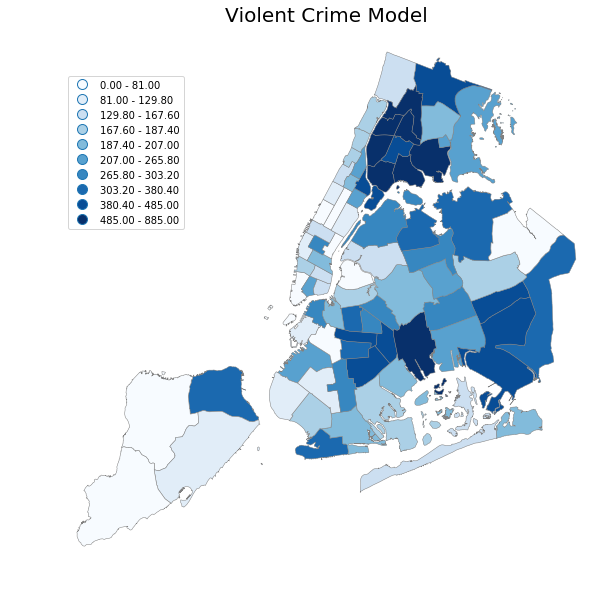

In [74]:
#make cloropleth of precincts shaded by allocation in this model 

f,ax = plt.subplots(figsize=(10,10))
precinct.plot(column='MODEL_allocation_14', cmap="Blues", edgecolor="grey",ax=ax,
              scheme='quantiles',k=10, lw=.5, legend=True)
ax.axis('off')
plt.title('Violent Crime Model' ,fontsize=(20))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0,-.08,.25,1));

In [75]:
violent_arrests_09_14.to_csv('violent_crime_MODEL.csv')